# NeuralNetwork.

### Data Preparation.

In [0]:
# imports.
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import top_k_categorical_accuracy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [61]:
# read in the data.
df = pd.read_csv('https://raw.githubusercontent.com/spotify-song-suggester-1/spotify-app/master/ds/Data/Spotify_MoodsData.csv',index_col=[0])
# show the data frame.
print(df.shape)
df.head()

(16, 21)


,artist_name,track_name,track_id,popularity,year,genre,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,mood
48618,Rise Against,Like the Angel,4t2rjxCXIJnBmRBkXJOYa5,48,2013,grunge,80061,0.000747,0.512,166880,0.976,0.000025,10,0.2150,-3.092,0,0.0861,95.465,4,0.428,Excited
55603,Mac Miller,BDE (Best Day Ever) - Live,504jTZvXdP8YYVtd19rfuX,40,2013,rap,92664,0.008290,0.434,321960,0.862,0.000052,2,0.9460,-9.589,1,0.1020,96.205,4,0.262,Happy
68155,Justin Bieber,All That Matters,70XP39KE8vTgxtRXcwfxJA,59,2014,pop,111926,0.005080,0.696,191173,0.513,0.000000,6,0.0682,-5.567,0,0.0424,129.859,4,0.144,Motivated
73129,Zac Brown Band,Castaway,5PNcJn4oFNvlRfrZBHfqWh,58,2015,country,121789,0.149000,0.611,188053,0.782,0.000000,8,0.1150,-4.989,1,0.0475,101.313,4,0.915,Happy
74887,Fifth Harmony,Worth It,41Fflg7qHiVOD6dEPvsCzO,73,2015,dance,123771,0.063000,0.884,224573,0.765,0.000007,8,0.1180,-3.865,1,0.0882,99.987,4,0.594,Im a boss


In [62]:
# new data frame with encoded genre column.
moodframe = pd.concat([df,pd.get_dummies(df['mood'], prefix='mood')],axis=1)
# show the data frame.
print(moodframe.shape)
moodframe.head()

(16, 30)


,artist_name,track_name,track_id,popularity,year,genre,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,mood,mood_Calming,mood_Excited,mood_Happy,mood_Head Bobbers,mood_Im a boss,mood_Mad Energized,mood_Motivated,mood_Unwind & Relax,mood_Wake Up
48618,Rise Against,Like the Angel,4t2rjxCXIJnBmRBkXJOYa5,48,2013,grunge,80061,0.000747,0.512,166880,0.976,0.000025,10,0.2150,-3.092,0,0.0861,95.465,4,0.428,Excited,0,1,0,0,0,0,0,0,0
55603,Mac Miller,BDE (Best Day Ever) - Live,504jTZvXdP8YYVtd19rfuX,40,2013,rap,92664,0.008290,0.434,321960,0.862,0.000052,2,0.9460,-9.589,1,0.1020,96.205,4,0.262,Happy,0,0,1,0,0,0,0,0,0
68155,Justin Bieber,All That Matters,70XP39KE8vTgxtRXcwfxJA,59,2014,pop,111926,0.005080,0.696,191173,0.513,0.000000,6,0.0682,-5.567,0,0.0424,129.859,4,0.144,Motivated,0,0,0,0,0,0,1,0,0
73129,Zac Brown Band,Castaway,5PNcJn4oFNvlRfrZBHfqWh,58,2015,country,121789,0.149000,0.611,188053,0.782,0.000000,8,0.1150,-4.989,1,0.0475,101.313,4,0.915,Happy,0,0,1,0,0,0,0,0,0
74887,Fifth Harmony,Worth It,41Fflg7qHiVOD6dEPvsCzO,73,2015,dance,123771,0.063000,0.884,224573,0.765,0.000007,8,0.1180,-3.865,1,0.0882,99.987,4,0.594,Im a boss,0,0,0,0,1,0,0,0,0


In [63]:
# show only the audio features.
moodframe.iloc[0,7:20]

acousticness        0.000747
danceability           0.512
duration_ms           166880
energy                 0.976
instrumentalness    2.52e-05
key                       10
liveness               0.215
loudness              -3.092
mode                       0
speechiness           0.0861
tempo                 95.465
time_signature             4
valence                0.428
Name: 48618, dtype: object

In [64]:
# set the X_train data on the audio features.
X_train = moodframe.iloc[:,7:20].to_numpy()
# set the standard scalar 
scaler = StandardScaler()
# fit the scalar on the X_train data.
X_scaled = scaler.fit_transform(X_train)
# show the X_scaled array.
print(X_scaled.shape)

(16, 13)


In [65]:
# create a list of the genres.
mood = df.mood.unique().tolist()
mood

['Excited',
 'Happy',
 'Motivated',
 'Im a boss',
 'Unwind & Relax',
 'Mad Energized',
 'Calming',
 'Head Bobbers',
 'Wake Up']

In [66]:
# set the y_train with onehots.
onehots = moodframe.iloc[:,21:]
y_train = onehots.to_numpy()
print(y_train.shape)
y_train

(16, 9)


array([[0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0]], dtype=uint8)

### Base Model.

In [0]:
# function for NN model.
def create_model():
    # set the model.
    model = Sequential()
    # hidden layers.
    model.add(Dense(36, input_dim=13, activation='relu'))
    model.add(Dense(18, activation='relu'))
    model.add(Dense(9, activation='softmax'))
    # function for top 3.
    def top_3_accuracy(y_true, y_pred):
        return top_k_categorical_accuracy(y_true, y_pred, k=3)

    # set the optimizer.
    optimizer = Adam()
    # compile the model.
    model.compile(loss='categorical_crossentropy',
                        optimizer=optimizer,
                        metrics=['accuracy'])
    return model

In [18]:
# set the model.
model = create_model()
# show the model summary.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 36)                504       
_________________________________________________________________
dense_7 (Dense)              (None, 18)                666       
_________________________________________________________________
dense_8 (Dense)              (None, 9)                 171       
Total params: 1,341
Trainable params: 1,341
Non-trainable params: 0
_________________________________________________________________


In [19]:
# set the model.
model = create_model()
# fit the model and create history.
history = model.fit(X_scaled, y_train, validation_split=0.2, batch_size=5, epochs=10)

Train on 12 samples, validate on 4 samples
Epoch 1/10
12/12 [==============================] - 2s 136ms/sample - loss: 2.3198 - acc: 0.0000e+00 - val_loss: 2.5256 - val_acc: 0.0000e+00
Epoch 2/10
12/12 [==============================] - 0s 1ms/sample - loss: 2.2528 - acc: 0.0000e+00 - val_loss: 2.5307 - val_acc: 0.0000e+00
Epoch 3/10
12/12 [==============================] - 0s 1ms/sample - loss: 2.2024 - acc: 0.0000e+00 - val_loss: 2.5344 - val_acc: 0.0000e+00
Epoch 4/10
12/12 [==============================] - 0s 1ms/sample - loss: 2.1529 - acc: 0.0833 - val_loss: 2.5393 - val_acc: 0.0000e+00
Epoch 5/10
12/12 [==============================] - 0s 1ms/sample - loss: 2.1046 - acc: 0.1667 - val_loss: 2.5440 - val_acc: 0.0000e+00
Epoch 6/10
12/12 [==============================] - 0s 1ms/sample - loss: 2.0591 - acc: 0.1667 - val_loss: 2.5472 - val_acc: 0.0000e+00
Epoch 7/10
12/12 [==============================] - 0s 1ms/sample - loss: 2.0128 - acc: 0.1667 - val_loss: 2.5494 - val_acc: 0.

In [20]:
# base model accuracy score.
scores = model.evaluate(X_scaled, y_train)

16/16 [==============================] - 0s 160us/sample - loss: 2.0271 - acc: 0.4375


#### Base Model Visuals.

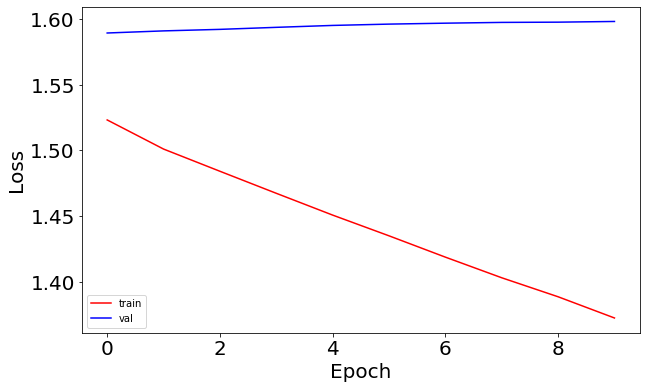

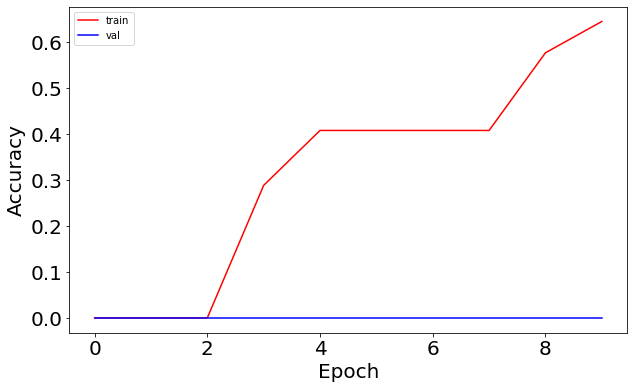

In [21]:
# plot the model loss.
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# plot the model accuracy.
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['acc']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Optimizer. *(SGD)*

In [0]:
# function for NN model.
def create_model(optimizer='adam'):
    # set the model.
    model = Sequential()
    # hidden layers.
    model.add(Dense(36, input_dim=13, activation='relu'))
    model.add(Dense(18, activation='relu'))
    model.add(Dense(9, activation='softmax'))
    # function for top 3.
    def top_3_accuracy(y_true, y_pred):
        return top_k_categorical_accuracy(y_true, y_pred, k=3)

    # set the optimizer.
    optimizer = Adam()
    # compile the model.
    model.compile(loss='categorical_crossentropy',
                        optimizer=optimizer,
                        metrics=['accuracy'])
    return model

In [0]:
# set the model with KerasClassifier.
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=5, validation_split=0.2, verbose=0)

In [0]:
# set the parameters for optimizer.
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

In [26]:
# set the gridsearch.
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_scaled, y_train)
# show the results.
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.13333333730697633 using {'optimizer': 'SGD'}
Means: 0.13333333730697633, Stdev: 0.16329932105224407 with: {'optimizer': 'SGD'}
Means: 0.13333333730697633, Stdev: 0.16329932105224407 with: {'optimizer': 'RMSprop'}
Means: 0.0, Stdev: 0.0 with: {'optimizer': 'Adagrad'}
Means: 0.06666666865348816, Stdev: 0.13333333730697633 with: {'optimizer': 'Adadelta'}
Means: 0.06666666865348816, Stdev: 0.13333333730697633 with: {'optimizer': 'Adam'}
Means: 0.06666666865348816, Stdev: 0.13333333730697633 with: {'optimizer': 'Adamax'}
Means: 0.13333333730697633, Stdev: 0.16329932105224407 with: {'optimizer': 'Nadam'}


### learning Rate.*(0.0)*

In [0]:
# function for NN model.
def create_model(learn_rate=0.0):
    # set the model.
    model = Sequential()
    # hidden layers.
    model.add(Dense(36, input_dim=13, activation='relu'))
    model.add(Dense(18, activation='relu'))
    model.add(Dense(9, activation='softmax'))
    # function for top 3.
    def top_3_accuracy(y_true, y_pred):
        return top_k_categorical_accuracy(y_true, y_pred, k=3)

    # set the optimizer.
    optimizer = SGD(lr=learn_rate)
    # compile the model.
    model.compile(loss='categorical_crossentropy',
                        optimizer=optimizer,
                        metrics=['accuracy'])
    return model

In [0]:
# set the model with KerasClassifier.
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=5, validation_split=0.2, verbose=0)

In [0]:
# set the parameters for learn rate.
learn_rate = [0, 0.001, 0.01, 0.05]
param_grid = dict(learn_rate=learn_rate)

In [19]:
# set the gridsearch.
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_scaled, y_train)
# show the results.
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.25000000596046446 using {'learn_rate': 0}
Means: 0.25000000596046446, Stdev: 0.1290994487210439 with: {'learn_rate': 0}
Means: 0.06666666865348816, Stdev: 0.13333333730697633 with: {'learn_rate': 0.001}
Means: 0.0, Stdev: 0.0 with: {'learn_rate': 0.01}
Means: 0.06666666865348816, Stdev: 0.13333333730697633 with: {'learn_rate': 0.05}


### Activation Function.*(relu)*

In [0]:
# function for NN model.
def create_model(activation='relu'):
    # set the model.
    model = Sequential()
    # hidden layers.
    model.add(Dense(36, input_dim=13, activation=activation))
    model.add(Dense(18, activation=activation))
    model.add(Dense(9, activation='softmax'))
    # function for top 3.
    def top_3_accuracy(y_true, y_pred):
        return top_k_categorical_accuracy(y_true, y_pred, k=3)

    # set the optimizer.
    optimizer = SGD(lr=0.0)
    # compile the model.
    model.compile(loss='categorical_crossentropy',
                        optimizer=optimizer,
                        metrics=['accuracy'])
    return model

In [0]:
# set the model with KerasClassifier.
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=5, validation_split=0.2, verbose=0)

In [0]:
# set the parameters for activation.
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

In [23]:
# set the gridsearch.
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_scaled, y_train)
# show the results.
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Best: 0.18333333730697632 using {'activation': 'relu'}
Means: 0.13333333730697633, Stdev: 0.16329932105224407 with: {'activation': 'softmax'}
Means: 0.13333333730697633, Stdev: 0.16329932105224407 with: {'activation': 'softplus'}
Means: 0.0, Stdev: 0.0 with: {'activation': 'softsign'}
Means: 0.18333333730697632, Stdev: 0.26034166324076147 with: {'activation': 'relu'}
Means: 0.0, Stdev: 0.0 with: {'activation': 'tanh'}
Means: 0.13333333730697633, Stdev: 0.16329932105224407 with: {'activation': 'sigmoid'}
Means: 0.05, Stdev: 0.10000000000000002 with: {'activation': 'hard_sigmoid'}
Means: 0.06666666865348816, Stdev: 0.13333333730697633 with: {'activation': 'linear'}


### Hidden Neuron Count.*(144)*

In [0]:
# function for NN model.
def create_model(neurons=1):
    # set the model.
    model = Sequential()
    # hidden layers.
    model.add(Dense(36, input_dim=13, activation='relu'))
    model.add(Dense(18, activation='relu'))
    model.add(Dense(9, activation='softmax'))
    # function for top 3.
    def top_3_accuracy(y_true, y_pred):
        return top_k_categorical_accuracy(y_true, y_pred, k=3)

    # set the optimizer.
    optimizer = SGD(lr=0.0)
    # compile the model.
    model.compile(loss='categorical_crossentropy',
                        optimizer=optimizer,
                        metrics=['accuracy'])
    return model

In [0]:
# set the model with KerasClassifier.
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=5, validation_split=0.2, verbose=0)

In [0]:
# set the parameters for neurons.
neurons = [9, 18, 36, 72, 144, 288, 576, 1152]
param_grid = dict(neurons=neurons)

In [28]:
# set the gridsearch.
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_scaled, y_train)
# show the results.
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.25000000596046446 using {'neurons': 144}
Means: 0.20000000596046447, Stdev: 0.16329932105224407 with: {'neurons': 9}
Means: 0.06666666865348816, Stdev: 0.13333333730697633 with: {'neurons': 18}
Means: 0.06666666865348816, Stdev: 0.13333333730697633 with: {'neurons': 36}
Means: 0.0, Stdev: 0.0 with: {'neurons': 72}
Means: 0.25000000596046446, Stdev: 0.1290994487210439 with: {'neurons': 144}
Means: 0.13333333730697633, Stdev: 0.16329932105224407 with: {'neurons': 288}
Means: 0.0, Stdev: 0.0 with: {'neurons': 576}
Means: 0.0, Stdev: 0.0 with: {'neurons': 1152}


### Weight Initialization.*(glorot_normal)*

In [0]:
# function for NN model.
def create_model(weight_init='uniform'):
    # set the model.
    model = Sequential()
    # hidden layers.
    model.add(Dense(144, input_dim=13, kernel_initializer=weight_init, activation='relu'))
    model.add(Dense(72, kernel_initializer=weight_init, activation='relu'))
    model.add(Dense(36, kernel_initializer=weight_init, activation='relu'))
    model.add(Dense(18, kernel_initializer=weight_init, activation='relu'))
    model.add(Dense(9, kernel_initializer=weight_init, activation='softmax'))
    # function for top 3.
    def top_3_accuracy(y_true, y_pred):
        return top_k_categorical_accuracy(y_true, y_pred, k=3)

    # set the optimizer.
    optimizer = SGD(lr=0.0)
    # compile the model.
    model.compile(loss='categorical_crossentropy',
                        optimizer=optimizer,
                        metrics=['accuracy'])
    return model

In [0]:
# set the KerasClassifier model.
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=5, validation_split=0.2, verbose=0)

In [0]:
# set the parameters for weight initializer.
weight_init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(weight_init=weight_init)

In [35]:
# set the gridsearch.
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_scaled, y_train)
# show the results.
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Best: 0.18333333730697632 using {'weight_init': 'glorot_normal'}
Means: 0.0, Stdev: 0.0 with: {'weight_init': 'uniform'}
Means: 0.13333333730697633, Stdev: 0.16329932105224407 with: {'weight_init': 'lecun_uniform'}
Means: 0.1, Stdev: 0.20000000000000004 with: {'weight_init': 'normal'}
Means: 0.13333333730697633, Stdev: 0.26666667461395266 with: {'weight_init': 'zero'}
Means: 0.18333333730697632, Stdev: 0.26034166324076147 with: {'weight_init': 'glorot_normal'}
Means: 0.11666666865348815, Stdev: 0.14529663441410853 with: {'weight_init': 'glorot_uniform'}
Means: 0.13333333730697633, Stdev: 0.16329932105224407 with: {'weight_init': 'he_normal'}
Means: 0.13333333730697633, Stdev: 0.16329932105224407 with: {'weight_init': 'he_uniform'}


### Dropout Rate.*(0.1)*

In [0]:
# function for NN model.
def create_model(weight_rate=0.0, weight_constraint=0):
       # set the model.
    model = Sequential()
    # hidden layers.
    model.add(Dense(144, input_dim=13, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dropout(weight_rate))
    model.add(Dense(72, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dropout(weight_rate))
    model.add(Dense(36, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dropout(weight_rate))
    model.add(Dense(18, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dropout(weight_rate))
    model.add(Dense(9, kernel_initializer='glorot_normal', activation='softmax'))
    # function for top 3.
    def top_3_accuracy(y_true, y_pred):
        return top_k_categorical_accuracy(y_true, y_pred, k=3)

    # set the optimizer.
    optimizer = SGD(lr=0.0)
    # compile the model.
    model.compile(loss='categorical_crossentropy',
                        optimizer=optimizer,
                        metrics=['accuracy'])
    return model

In [0]:
# set the KerasClassifier model.
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=5, validation_split=0.2, verbose=0)

In [0]:
# set the parameters for weights and dropout rate.
weight_constraint = [1, 2, 3]
weight_rate = [0, 0.1, 0.2]
param_grid = dict(weight_rate=weight_rate, weight_constraint=weight_constraint)

In [74]:
# set the gridsearch.
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_scaled, y_train)
# show the results.
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.18333333730697632 using {'weight_constraint': 1, 'weight_rate': 0.1}
Means: 0.0, Stdev: 0.0 with: {'weight_constraint': 1, 'weight_rate': 0}
Means: 0.18333333730697632, Stdev: 0.15275252706723463 with: {'weight_constraint': 1, 'weight_rate': 0.1}
Means: 0.0, Stdev: 0.0 with: {'weight_constraint': 1, 'weight_rate': 0.2}
Means: 0.13333333730697633, Stdev: 0.16329932105224407 with: {'weight_constraint': 2, 'weight_rate': 0}
Means: 0.0, Stdev: 0.0 with: {'weight_constraint': 2, 'weight_rate': 0.1}
Means: 0.0, Stdev: 0.0 with: {'weight_constraint': 2, 'weight_rate': 0.2}
Means: 0.06666666865348816, Stdev: 0.13333333730697633 with: {'weight_constraint': 3, 'weight_rate': 0}
Means: 0.06666666865348816, Stdev: 0.13333333730697633 with: {'weight_constraint': 3, 'weight_rate': 0.1}
Means: 0.0, Stdev: 0.0 with: {'weight_constraint': 3, 'weight_rate': 0.2}


### Batch Size.*(8)*

In [0]:
# function for NN model.
def create_model():
      # set the model.
    model = Sequential()
    # hidden layers.
    model.add(Dense(144, input_dim=13, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(72, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(36, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(18, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(9, kernel_initializer='glorot_normal', activation='softmax'))
    # function for top 3.
    def top_3_accuracy(y_true, y_pred):
        return top_k_categorical_accuracy(y_true, y_pred, k=3)

    # set the optimizer.
    optimizer = SGD(lr=0.0)
    # compile the model.
    model.compile(loss='categorical_crossentropy',
                        optimizer=optimizer,
                        metrics=['accuracy'])
    return model

In [0]:
# set the KerasClassifier model.
model = KerasClassifier(build_fn=create_model, epochs=10, validation_split=0.2, verbose=0)

In [0]:
# set the parameters for batch size.
batch_size = [2,4,6,8,10,12]
param_grid = dict(batch_size=batch_size)

In [49]:
# set the gridsearch.
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_scaled, y_train)
# show the results.
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.2333333373069763 using {'batch_size': 8}
Means: 0.05, Stdev: 0.10000000000000002 with: {'batch_size': 2}
Means: 0.13333333730697633, Stdev: 0.16329932105224407 with: {'batch_size': 4}
Means: 0.13333333730697633, Stdev: 0.16329932105224407 with: {'batch_size': 6}
Means: 0.2333333373069763, Stdev: 0.20000000198682152 with: {'batch_size': 8}
Means: 0.13333333730697633, Stdev: 0.16329932105224407 with: {'batch_size': 10}
Means: 0.05, Stdev: 0.10000000000000002 with: {'batch_size': 12}


### Epochs.*(500)*

In [0]:
# function for NN model.
def create_model():
      # set the model.
    model = Sequential()
    # hidden layers.
    model.add(Dense(144, input_dim=13, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(72, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(36, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(18, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(9, kernel_initializer='glorot_normal', activation='softmax'))
    # function for top 3.
    def top_3_accuracy(y_true, y_pred):
        return top_k_categorical_accuracy(y_true, y_pred, k=3)

    # set the optimizer.
    optimizer = SGD(lr=0.0)
    # compile the model.
    model.compile(loss='categorical_crossentropy',
                        optimizer=optimizer,
                        metrics=['accuracy'])
    return model

In [0]:
# set the KerasClassifier model.
model = KerasClassifier(build_fn=create_model, batch_size=8, validation_split=0.2, verbose=0)

In [0]:
# set the parameters for epochs.
epochs = [10, 50, 100, 200, 500]
param_grid = dict(epochs=epochs)

In [54]:
# set the gridsearch.
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
# fit the model.
grid_result = grid.fit(X_scaled, y_train)
# show the results.
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.20000000596046447 using {'epochs': 500}
Means: 0.06666666865348816, Stdev: 0.13333333730697633 with: {'epochs': 10}
Means: 0.06666666865348816, Stdev: 0.13333333730697633 with: {'epochs': 50}
Means: 0.0, Stdev: 0.0 with: {'epochs': 100}
Means: 0.18333333730697632, Stdev: 0.15275252706723463 with: {'epochs': 200}
Means: 0.20000000596046447, Stdev: 0.26666667461395266 with: {'epochs': 500}


### Final Model.

In [0]:
# function for NN model.
def create_model():
      # set the model.
    model = Sequential()
    # hidden layers.
    model.add(Dense(144, input_dim=13, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(72, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(36, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(18, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(9, kernel_initializer='glorot_normal', activation='softmax'))
    # function for top 3.
    def top_3_accuracy(y_true, y_pred):
        return top_k_categorical_accuracy(y_true, y_pred, k=3)

    # set the optimizer.
    optimizer = SGD(lr=0.0)
    # compile the model.
    model.compile(loss='categorical_crossentropy',
                        optimizer=optimizer,
                        metrics=['accuracy'])
    return model

In [0]:
# set the model.
model = create_model()
# fit the model, create history.
history = model.fit(X_scaled, y_train, validation_split=0.2, epochs=500, batch_size=8, verbose=0)

In [77]:
# final model accuracy score.
scores = model.evaluate(X_scaled, y_train)

16/16 [==============================] - 0s 537us/sample - loss: 2.1677 - acc: 0.1250


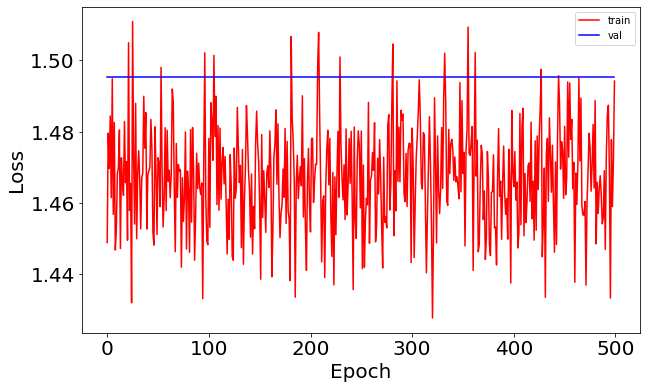

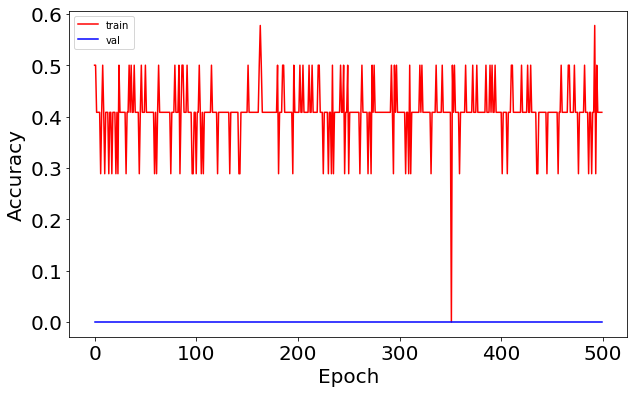

In [78]:
# plot the model loss.
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# plot the model accuracy.
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['acc']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)